In [194]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [195]:
# loading data
csvpath = Path('../Project-03/teamGameStats.csv')
teamstats_df = pd.read_csv(csvpath)

In [196]:
# dropping unneeded columns
# subsequent analysis dropped '+/-' and 'PTS' columns
teamstats_df = teamstats_df.drop(columns=['TEAM','GAMEDATE','+/-','PTS'])

In [197]:
#X.info()

In [198]:
# defining target vector
y=teamstats_df['W/L'].values.reshape(-1,1)
# defining target vector
#y=teamstats_df['W/L'].ravel()
y[:5]

array([['W'],
       ['W'],
       ['L'],
       ['W'],
       ['L']], dtype=object)

In [199]:
# converting 'W/L' to 0/1's
y=teamstats_df['W/L'].apply(lambda x: 1 if x=="W" else 0)
y[:5]

0    1
1    1
2    0
3    1
4    0
Name: W/L, dtype: int64

In [200]:
# converting 'W/L' to 0/1's
teamstats_df['H/A'] = teamstats_df['H/A'].apply(lambda x: 1 if x=="vs" else 0)
teamstats_df[:5]

,TEAM1,H/A,TEAM2,W/L,MIN,FGM,FGA,FG%,3PM,3PA,...,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF
0,ATL,1,IND,W,48,45,92,48.9,13,32,...,34,76.5,14,37,51,20,10,8,7,19
1,CHA,1,POR,W,48,39,83,47.0,18,43,...,17,76.5,7,39,46,26,14,6,8,25
2,NOP,0,NYK,L,53,41,101,40.6,6,27,...,30,80.0,20,32,52,25,13,6,4,16
3,MIA,1,BKN,W,48,38,87,43.7,16,39,...,21,81.0,16,37,53,28,17,9,1,13
4,POR,0,CHA,L,48,36,91,39.6,10,36,...,28,67.9,13,34,47,18,9,7,3,17


In [201]:
pd.get_dummies(teamstats_df, columns=['TEAM1','TEAM2']).head()

,H/A,W/L,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,TEAM2_OKC,TEAM2_ORL,TEAM2_PHI,TEAM2_PHX,TEAM2_POR,TEAM2_SAC,TEAM2_SAS,TEAM2_TOR,TEAM2_UTA,TEAM2_WAS
0,1,W,48,45,92,48.9,13,32,40.6,26,...,0,0,0,0,0,0,0,0,0,0
1,1,W,48,39,83,47.0,18,43,41.9,13,...,0,0,0,0,0,0,0,0,0,0
2,0,L,53,41,101,40.6,6,27,22.2,24,...,0,0,0,0,0,0,0,0,0,0
3,1,W,48,38,87,43.7,16,39,41.0,17,...,0,0,0,0,0,0,0,0,0,0
4,0,L,48,36,91,39.6,10,36,27.8,19,...,0,0,0,0,0,0,0,0,0,0


In [202]:
teamstats_df = teamstats_df.drop(columns=['TEAM1','TEAM2'])

In [203]:
# defining 'W/L' column as feature set
X = teamstats_df.copy()
X.drop('W/L', axis=1, inplace=True)
X.head(16)

,H/A,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF
0,1,48,45,92,48.9,13,32,40.6,26,34,76.5,14,37,51,20,10,8,7,19
1,1,48,39,83,47.0,18,43,41.9,13,17,76.5,7,39,46,26,14,6,8,25
2,0,53,41,101,40.6,6,27,22.2,24,30,80.0,20,32,52,25,13,6,4,16
3,1,48,38,87,43.7,16,39,41.0,17,21,81.0,16,37,53,28,17,9,1,13
4,0,48,36,91,39.6,10,36,27.8,19,28,67.9,13,34,47,18,9,7,3,17
5,0,48,37,82,45.1,14,33,42.4,18,21,85.7,9,37,46,22,23,6,8,19
6,0,48,36,88,40.9,17,45,37.8,16,21,76.2,6,31,37,27,11,6,7,21
7,1,48,41,91,45.1,11,32,34.4,17,19,89.5,9,27,36,28,15,10,5,19
8,1,48,37,96,38.5,17,38,44.7,21,24,87.5,16,31,47,23,15,9,5,15
9,0,48,45,92,48.9,10,32,31.3,17,20,85.0,8,33,41,33,12,7,5,27


In [204]:
teamstats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13658 entries, 0 to 13657
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   H/A     13658 non-null  int64  
 1   W/L     13658 non-null  object 
 2   MIN     13658 non-null  int64  
 3   FGM     13658 non-null  int64  
 4   FGA     13658 non-null  int64  
 5   FG%     13658 non-null  float64
 6   3PM     13658 non-null  int64  
 7   3PA     13658 non-null  int64  
 8   3P%     13658 non-null  float64
 9   FTM     13658 non-null  int64  
 10  FTA     13658 non-null  int64  
 11  FT%     13658 non-null  float64
 12  OREB    13658 non-null  int64  
 13  DREB    13658 non-null  int64  
 14  REB     13658 non-null  int64  
 15  AST     13658 non-null  int64  
 16  TOV     13658 non-null  int64  
 17  STL     13658 non-null  int64  
 18  BLK     13658 non-null  int64  
 19  PF      13658 non-null  int64  
dtypes: float64(3), int64(16), object(1)
memory usage: 2.1+ MB


In [205]:
teamstats_df.info('include=all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13658 entries, 0 to 13657
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   H/A     13658 non-null  int64  
 1   W/L     13658 non-null  object 
 2   MIN     13658 non-null  int64  
 3   FGM     13658 non-null  int64  
 4   FGA     13658 non-null  int64  
 5   FG%     13658 non-null  float64
 6   3PM     13658 non-null  int64  
 7   3PA     13658 non-null  int64  
 8   3P%     13658 non-null  float64
 9   FTM     13658 non-null  int64  
 10  FTA     13658 non-null  int64  
 11  FT%     13658 non-null  float64
 12  OREB    13658 non-null  int64  
 13  DREB    13658 non-null  int64  
 14  REB     13658 non-null  int64  
 15  AST     13658 non-null  int64  
 16  TOV     13658 non-null  int64  
 17  STL     13658 non-null  int64  
 18  BLK     13658 non-null  int64  
 19  PF      13658 non-null  int64  
dtypes: float64(3), int64(16), object(1)
memory usage: 2.1+ MB


In [206]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [207]:
# Creating StandardScaler instance
#scaler = StandardScaler()

# Fitting Standard Scaller
#X_scaler = scaler.fit(X_train)

In [208]:
# Scaling data
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [209]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=40, random_state=78)

In [210]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)
#rf_model = rf_model.fit(X_train_scaled, y_train)

In [211]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test)
#predictions = rf_model.predict(X_test_scaled)

In [212]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [213]:
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1382,322
Actual 1,342,1369


Accuracy Score : 0.8055636896046852
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1704
           1       0.81      0.80      0.80      1711

    accuracy                           0.81      3415
   macro avg       0.81      0.81      0.81      3415
weighted avg       0.81      0.81      0.81      3415



In [214]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

In [215]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.16483125324278666, 'FG%'),
 (0.10311700080519152, 'DREB'),
 (0.08598901864986816, '3P%'),
 (0.08378257806791031, 'REB'),
 (0.059622863350391284, 'FGM'),
 (0.05250252852943199, 'STL'),
 (0.04796507987690312, 'TOV'),
 (0.04683717208218886, 'FT%'),
 (0.04425251743497474, 'FTM'),
 (0.044099658558703306, 'AST'),
 (0.04004860467477877, 'PF'),
 (0.039441463109682696, 'FGA'),
 (0.038202914127921005, 'FTA'),
 (0.0351696433517236, '3PA'),
 (0.03281500818841064, 'BLK'),
 (0.03183572022643383, 'OREB'),
 (0.03164332241140645, '3PM'),
 (0.011442847560005968, 'H/A'),
 (0.006400805751287084, 'MIN')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

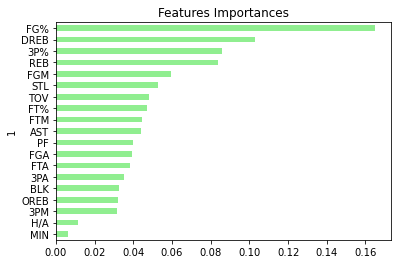

In [216]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)